In [175]:
import pandas as pd

In [176]:
data=pd.read_csv('dataset.csv')

In [177]:
data.head()

,RowNumber,variable1,variable2,variable3,result
0,1,435,78,D,34884
1,2,285,94,C,25393
2,3,162,62,A,14560
3,4,648,47,D,47260
4,5,11,71,C,5494


In [178]:
#check how balanced/random the data is

In [179]:
x = data.iloc[:,1:4]
y = data.iloc[:,4]
print(x)
#variable =pd.get_dummies(x['variable3'],drop_first=True)
print(variable)
variable.head()

      variable1  variable2 variable3
0           435         78         D
1           285         94         C
2           162         62         A
3           648         47         D
4            11         71         C
...         ...        ...       ...
3995         46         27         D
3996        171         37         B
3997        801         22         C
3998        793         78         B
3999        913         61         D

[4000 rows x 3 columns]
      B  C  D
0     0  0  1
1     0  1  0
2     0  0  0
3     0  0  1
4     0  1  0
...  .. .. ..
3995  0  0  1
3996  1  0  0
3997  0  1  0
3998  1  0  0
3999  0  0  1

[4000 rows x 3 columns]


,B,C,D
0,0,0,1
1,0,1,0
2,0,0,0
3,0,0,1
4,0,1,0


In [180]:
#x=x.drop(['variable3'],axis=1)
x.head()

,variable1,variable2,variable3
0,435,78,D
1,285,94,C
2,162,62,A
3,648,47,D
4,11,71,C


In [181]:
title_mapping = {"A": 1, "B": 2, "C": 3, "D": 4}
X = [x]
for dataset in X:
    dataset['variable3'] = dataset['variable3'].map(title_mapping)

x.head()

,variable1,variable2,variable3
0,435,78,4
1,285,94,3
2,162,62,1
3,648,47,4
4,11,71,3


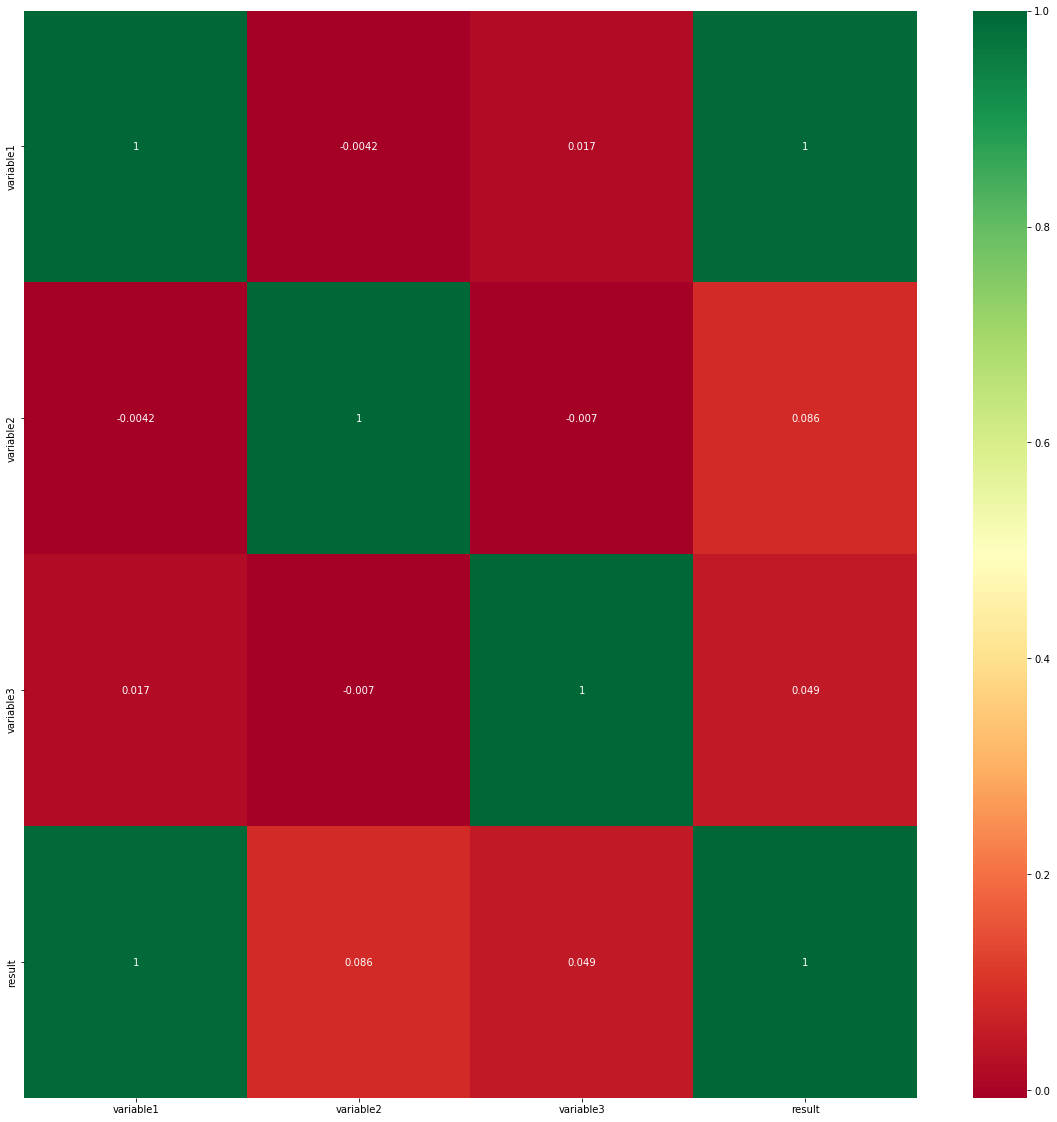

In [182]:
X = pd.concat([x,y], axis=1)
## Correlation
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
g=sns.heatmap(X.corr(),annot=True,cmap="RdYlGn")

In [183]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train , y_test = train_test_split(x,y, random_state = 0, test_size = 0.2)
print(x_test)

      variable1  variable2  variable3
2230        828         40          1
668          73         10          3
3616        762         99          3
2363        206         75          4
142         862         15          2
...         ...        ...        ...
1118        805         98          1
3572        480         55          1
2482        889         76          3
643         961         85          2
299         769         94          1

[800 rows x 3 columns]


In [184]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#x_train = sc.fit_transform(x_train)
#x_test = sc.transform(x_test)
#print(x_train)

In [185]:
from xgboost import XGBRegressor

params={
 "n_estimators"     : [10,100,200,500,800,1000,1200,1500,1700,2000,2200,2400,2600,2800,3000],
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7, 8,9,10 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4, 0.5,0.6 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}
model = XGBRegressor()

In [186]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [187]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
random_search=RandomizedSearchCV(model,param_distributions=params,n_iter=5,n_jobs=-1,cv=5,verbose=3)


In [188]:
from datetime import datetime
start_time = timer(None)
random_search.fit(x_train,y_train)
timer(start_time)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:    7.2s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    8.2s finished



 Time taken: 0 hours 0 minutes and 12.87 seconds.


In [189]:
random_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.3, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.35, max_delta_step=0, max_depth=10,
             min_child_weight=5, missing=nan, monotone_constraints='()',
             n_estimators=2400, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [190]:
random_search.best_params_

{'n_estimators': 2400,
 'min_child_weight': 5,
 'max_depth': 10,
 'learning_rate': 0.35,
 'gamma': 0.3,
 'colsample_bytree': 0.7}

In [191]:

model = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.25, max_delta_step=0, max_depth=3,
             min_child_weight=5, monotone_constraints='()',
             n_estimators=800, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None
)

In [192]:
from datetime import datetime
start_time = timer(None)
model.fit(x_train, y_train)
timer(start_time)


 Time taken: 0 hours 0 minutes and 0.52 seconds.


In [193]:
from sklearn.metrics import mean_absolute_error
predictions = model.predict(x_test)
print(x_test)
print(predictions)

      variable1  variable2  variable3
2230        828         40          1
668          73         10          3
3616        762         99          3
2363        206         75          4
142         862         15          2
...         ...        ...        ...
1118        805         98          1
3572        480         55          1
2482        889         76          3
643         961         85          2
299         769         94          1

[800 rows x 3 columns]
[57009.586   5871.673  57455.336  19543.957  58001.496  23607.447
 54279.684  30657.25   61310.49   41541.96   39843.016  62908.23
  8753.461  20016.836  19737.074  15407.109  54300.945  19434.436
 65550.555  45667.29    9468.769  42541.71   67547.016   7114.6216
  5108.1655 14915.416  47959.902  40681.465  35438.26   28439.523
 11655.567  35600.07   53956.562  60953.87   33931.99   20362.56
 43702.266  34052.242  29526.574  16347.73   21192.09   35599.152
 24002.096  34803.25   17504.227  35957.69   59538.152  332

In [194]:
mae = mean_absolute_error(predictions, y_test)
print("the mean absolute error is ", mae)

the mean absolute error is  269.1686050415039


In [195]:
testSample=pd.read_csv("file.csv")
test = testSample.iloc[:,1:4]
answer = testSample.iloc[:,4]
print(test)
print(answer)

   variable1  variable2 variable3
0        552         96         A
1        552         96         B
2        552         96         C
3        552         96         D
0    42120
1    42768
2    43416
3    44064
Name: result, dtype: int64


In [196]:
variable2 =pd.get_dummies(test['variable3'],drop_first=True)

print(variable2)

   B  C  D
0  0  0  0
1  1  0  0
2  0  1  0
3  0  0  1


In [197]:
test=test.drop(['variable3'],axis=1)
test=pd.concat([test,variable2],axis=1)
print(test)

   variable1  variable2  B  C  D
0        552         96  0  0  0
1        552         96  1  0  0
2        552         96  0  1  0
3        552         96  0  0  1


In [198]:
prediction2 = model.predict(test)
print(prediction2)

ValueError: feature_names mismatch: ['variable1', 'variable2', 'variable3'] ['variable1', 'variable2', 'B', 'C', 'D']
expected variable3 in input data
training data did not have the following fields: B, C, D

In [ ]:
import pickle

In [ ]:
with open('model_pickle', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
with open('model_pickle', 'rb') as f:
    mp = pickle.load(f)

In [ ]:
print(mp.predict(test))